### important imports

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation as cv
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import plotly
import plotly.plotly as py
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

### Loading the Datafiles.

In [5]:
data_cols = ['user_id', 'item_id', 'rating', 'timestamp']
u_data_df = pd.read_table("u.data", header = None, delim_whitespace = True, names = data_cols)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
u_user_df = pd.read_table("u.user", header = None, sep ='|', names = user_cols)

#### plotting the histogram for age and rating frequency

In [6]:
trace = [go.Histogram(
    x = u_user_df.age
    )]
layout = go.Layout(
    xaxis = dict(
        title='Age'
        ),
    yaxis = dict(
        title='frequency'
        )
    )
pfig = go.Figure(data=trace, layout=layout)
plot.iplot(pfig, filename='text-hover-bar')

In [7]:
u_data_df['time'] = pd.to_datetime(u_data_df['timestamp'], unit ='s')
u_data_df['year'] = u_data_df.time.dt.year

In [8]:
u_data_df.head()

,user_id,item_id,rating,timestamp,time,year
0,196,242,3,881250949,1997-12-04 15:55:49,1997
1,186,302,3,891717742,1998-04-04 19:22:22,1998
2,22,377,1,878887116,1997-11-07 07:18:36,1997
3,244,51,2,880606923,1997-11-27 05:02:03,1997
4,166,346,1,886397596,1998-02-02 05:33:16,1998


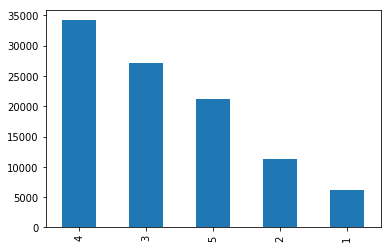

In [9]:
u_data_df.rating.value_counts().plot( kind = 'bar')

In [10]:
n_users = u_data_df.user_id.unique().shape[0]
n_items = u_data_df.item_id.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' || Number of movies = ' + str(n_items)) 

Number of users = 943 || Number of movies = 1682


In [11]:
train_data, test_data = cv.train_test_split(u_data_df, test_size=0.25)

In [12]:
table = pd.pivot_table(u_data_df, values='rating', index=['user_id'], columns=['item_id'])

In [13]:
table

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create two user-item matrices, one for training and another for testing ####

In [14]:
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [15]:
train_data_matrix

array([[ 0.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

#### Calculating pairwise distance from sklearn to calculate the cosine similarity ####

In [16]:
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

user_similarity1 = np.ones((943,1))-user_similarity
item_similarity1 = np.ones((1682,1))-item_similarity

#### Defining the prediction function

In [17]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [18]:
item_prediction = predict(train_data_matrix, item_similarity1, type='item')
user_prediction = predict(train_data_matrix, user_similarity1, type='user')

In [19]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [20]:
print ('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print ('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 2.9527997244900863
Item-based CF RMSE: 3.158668441274447


### Residual Plots

In [ ]:
err = user_prediction[item_prediction.nonzero()].flatten()-item_prediction[item_prediction.nonzero()].flatten()
err

array([ 1.04282892, -0.06063433, -0.33274005, ..., -0.41873312,
       -0.60001178, -0.70114656])

In [ ]:
data = [go.Histogram(x=err)]
layout = go.Layout(
    title='Error Histogram',
    xaxis=dict(
        title='Error',
        range = [-2,2]
    )
)
pfig = go.Figure(data=data, layout=layout)
plot.iplot(pfig, filename='ErrorHist')

In [ ]:
data = [go.Box(x=err)]
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='ErrorHist')